In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("path_to_file")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
for i in df.columns:
    if (df[i].dtype == 'object'):
        print(f'Unique Values in {i}: \n', df[i].unique(), '\n')

In [ ]:
AutoClean(df, mode='auto', duplicates=False, missing_num=False, missing_categ=False, 
          encode_categ=False, extract_datetime=False, outliers=False, outlier_param=1.5, 
          logfile=True, verbose=False)

In [ ]:
from AutoClean import AutoClean
pipeline = AutoClean(df)

### Autoclean: https://github.com/elisemercury/AutoClean
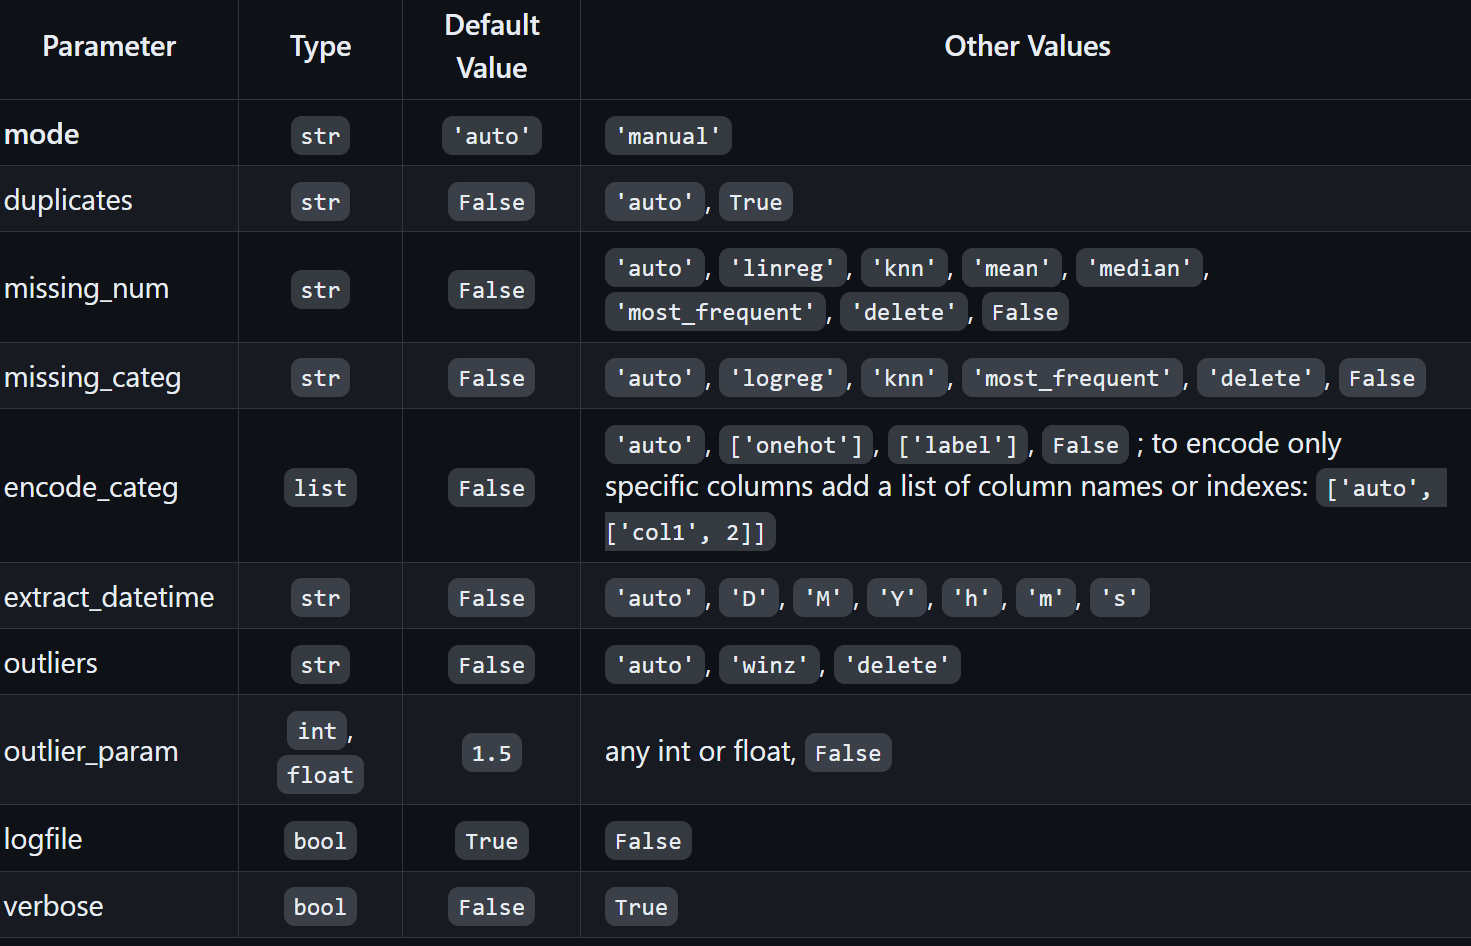

In [ ]:
df_processed = pipeline.output

In [ ]:
def plot_feature_distributions(df):
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Plot the distribution of the current feature
        plt.figure()
        plt.hist(df[column], bins=30, edgecolor='k')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()

In [ ]:
plot_feature_distributions(df_processed)

In [ ]:
pairplot_map = df_processed.corr()
top_corr_features = pairplot_map.index
plt.figure(figsize = (30, 30))

hm =sns.heatmap(df_processed[top_corr_features].corr(), annot = True)

In [ ]:
sc = StandardScaler() # Scaling for scale dependent algorithms
X = sc.fit_transform(df_processed)

In [ ]:
from sklearn.cluster import KMeans

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_clusters': [2, 3, 4, 5],
              'init': ['k-means++', 'random'],
              'n_init': [10, 20, 30],
              'max_iter': [100, 200, 300]}

# Create an instance of KMeans
kmeans = KMeans()

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(estimator=kmeans, param_distributions=param_grid, n_iter=20, cv=5)
random_search.fit(X)

# Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the K-means clustering with the best hyperparameters
best_kmeans = KMeans(**best_params)
best_kmeans.fit(X)

# Perform clustering and obtain cluster labels
cluster_labels = best_kmeans.predict(X)

# Evaluate the quality of clustering using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_score

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_clusters': [2, 3, 4, 5],
              'linkage': ['ward', 'complete', 'average'],
              'affinity': ['euclidean', 'manhattan']}

# Create an instance of AgglomerativeClustering
hierarchical = AgglomerativeClustering()

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(estimator=hierarchical, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X)

# Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the hierarchical clustering with the best hyperparameters
best_hierarchical = AgglomerativeClustering(**best_params)
cluster_labels = best_hierarchical.fit_predict(X)

# Evaluate the quality of clustering using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# Define the parameter grid for parameter tuning
param_grid = {'eps': [0.1, 0.5, 1.0],
              'min_samples': [2, 5, 10],
              'metric': ['euclidean', 'manhattan']}

# Create an instance of DBSCAN
dbscan = DBSCAN()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, cv=5)
grid_search.fit(X)

# Print the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the DBSCAN with the best parameters
best_dbscan = DBSCAN(**best_params)
cluster_labels = best_dbscan.fit_predict(X)

# Evaluate the quality of clustering using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)